## 문서와 문서 간의 유사도 비교
- 코사인 유사도는 벡터와 벡터 간의 유사도 비교시 벡터의 상호 방향성이 얼마나 유사한지에 기반
 > 두 벡터 사이의 사잇각을 구해서 얼마나 유사한지 수치로 적용
- 희소 행렬 기반에서 문서와 문서 벡터간의 크기에 기반한 유사도 지표는 정확도가 떨어지기가 쉬움
- 문서가 매우 긴 경우 단어의 빈도수가 더 많을 것이므로 빈도수에만 기반해서는 공정한 비교가 어려움
 > A문서에서 '머신러닝' 단어가 5번 언급되고 B문서에서는 3번 언급되었을 때 A문서가 B문서보다 10배 이상 크다면 오히려 B문서가 더 관련된 문서라고 볼 수 있음

<코사인 유사도>
![screenshot](./images/cos_similarity.png)

In [1]:
# 위의 식을 코드로 구현

# 서로간의 문서 유사도를 코사인 유사도 기반으로 도출
import numpy as np
def cos_similarity(v1,v2):
    dot_product = np.dot(v1,v2)
    l2_norm = (np.sqrt(sum(np.square(v1)))*np.sqrt(sum(np.square(v2))))
    similarity = dot_product / l2_norm
    return similarity

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
doc_list = ['if you take the blue pill, the story ends' ,
            'if you take the red pill, you stay in Wonderland',
            'if you take the red pill, I show you how deep the rabbit hole goes']
tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)

(3, 18)


In [3]:
# TFidfVectorizer로 transform()한 결과는 Sparse Matrix이므로 Dense Matrix로 변환. 
feature_vect_dense = feature_vect_simple.todense()

#첫번째 문장과 두번째 문장의 feature vector  추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect2 = np.array(feature_vect_dense[1]).reshape(-1,)

#첫번째 문장과 두번째 문장의 feature vector로 두개 문장의 Cosine 유사도 추출
similarity_simple = cos_similarity(vect1, vect2 )
print('문장 1, 문장 2 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 1, 문장 2 Cosine 유사도: 0.402


In [9]:
feature_vect_dense

matrix([[0.4155636 , 0.        , 0.4155636 , 0.        , 0.        ,
         0.        , 0.24543856, 0.        , 0.24543856, 0.        ,
         0.        , 0.        , 0.        , 0.4155636 , 0.24543856,
         0.49087711, 0.        , 0.24543856],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.23402865, 0.39624495, 0.23402865, 0.        ,
         0.3013545 , 0.        , 0.39624495, 0.        , 0.23402865,
         0.23402865, 0.39624495, 0.4680573 ],
        [0.        , 0.30985601, 0.        , 0.30985601, 0.30985601,
         0.30985601, 0.18300595, 0.        , 0.18300595, 0.30985601,
         0.23565348, 0.30985601, 0.        , 0.        , 0.18300595,
         0.3660119 , 0.        , 0.3660119 ]])

In [12]:
feature_vect_dense[0]

matrix([[0.4155636 , 0.        , 0.4155636 , 0.        , 0.        ,
         0.        , 0.24543856, 0.        , 0.24543856, 0.        ,
         0.        , 0.        , 0.        , 0.4155636 , 0.24543856,
         0.49087711, 0.        , 0.24543856]])

In [15]:
vect1

array([0.4155636 , 0.        , 0.4155636 , 0.        , 0.        ,
       0.        , 0.24543856, 0.        , 0.24543856, 0.        ,
       0.        , 0.        , 0.        , 0.4155636 , 0.24543856,
       0.49087711, 0.        , 0.24543856])

In [16]:
# 세번째 문장과 네번째 문장의 feature vector 추출
vect2 = np.array(feature_vect_dense[1]).reshape(-1,)
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)

# 첫번째 문장과 두번째 문장의 feature vector로 두 개 문장의 Cosine 유사도 추출
similarity_simple = cos_similarity(vect2, vect3)
print('문장 2, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

similarity_simple = cos_similarity(vect1, vect3)
print('문장 1, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 2, 문장 3 Cosine 유사도: 0.456
문장 1, 문장 3 Cosine 유사도: 0.404


In [21]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0] , feature_vect_simple)
# [0] 뒤에 전체를 넣음으로써 전체 비교
print(similarity_simple_pair)
print()

similarity_simple_pair = cosine_similarity(feature_vect_simple , feature_vect_simple)
print(similarity_simple_pair)

[[1.         0.40207758 0.40425045]]

[[1.         0.40207758 0.40425045]
 [0.40207758 1.         0.45647296]
 [0.40425045 0.45647296 1.        ]]


### 실습 - 아무 문장 가져와서 유사도 측정

In [8]:
# 서로간의 문서 유사도를 코사인 유사도 기반으로 도출
import numpy as np
def cos_similarity(v1,v2):
    dot_product = np.dot(v1,v2)
    l2_norm = (np.sqrt(sum(np.square(v1)))*np.sqrt(sum(np.square(v2))))
    similarity = dot_product / l2_norm
    return similarity

from sklearn.feature_extraction.text import TfidfVectorizer
doc_list = ["Please don't politicize this virus. It exploits the differences you have at the national level." 
            , "If you want to be exploited and if you want to have many more body bags, then you do it"
            , "If you don't want many more body bags, then you refrain from politicizing it."
            , "My short message is: Please quarantine politicizing Covid."
            , "The unity of your country will be very important to defeat this dangerous virus."]
tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print('shape: ', feature_vect_simple.shape)
print()

# TFidfVectorizer로 transform()한 결과는 Sparse Matrix이므로 Dense Matrix로 변환. 
feature_vect_dense = feature_vect_simple.todense()

#첫번째 문장과 두번째 문장의 feature vector  추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect2 = np.array(feature_vect_dense[1]).reshape(-1,)

#첫번째 문장과 두번째 문장의 feature vector로 두개 문장의 Cosine 유사도 추출
similarity_simple = cos_similarity(vect1, vect2 )
print('문장 1, 문장 2 Cosine 유사도: {0:.3f}'.format(similarity_simple))
print()

# 세번째 문장과 네번째 문장의 feature vector 추출
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)
vect4 = np.array(feature_vect_dense[3]).reshape(-1,)
vect5 = np.array(feature_vect_dense[4]).reshape(-1,)

# 첫번째 문장과 두번째 문장의 feature vector로 두 개 문장의 Cosine 유사도 추출
similarity_simple = cos_similarity(vect2, vect3)
print('문장 2, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))
print()
similarity_simple = cos_similarity(vect3, vect4)
print('문장 3, 문장 4 Cosine 유사도: {0:.3f}'.format(similarity_simple))
print()
similarity_simple = cos_similarity(vect4, vect5)
print('문장 4, 문장 5 Cosine 유사도: {0:.3f}'.format(similarity_simple))
print()
similarity_simple = cos_similarity(vect1, vect5)
print('문장 1, 문장 5 Cosine 유사도: {0:.3f}'.format(similarity_simple))
print()

# pair(전체) 비교
from sklearn.metrics.pairwise import cosine_similarity
similarity_simple_pair = cosine_similarity(feature_vect_simple[0] , feature_vect_simple)
# [0] 뒤에 전체를 넣음으로써 전체 비교
print(similarity_simple_pair)
print()

similarity_simple_pair = cosine_similarity(feature_vect_simple , feature_vect_simple)
print(similarity_simple_pair)

shape:  (5, 44)

문장 1, 문장 2 Cosine 유사도: 0.154

문장 2, 문장 3 Cosine 유사도: 0.635

문장 3, 문장 4 Cosine 유사도: 0.076

문장 4, 문장 5 Cosine 유사도: 0.000

문장 1, 문장 5 Cosine 유사도: 0.208

[[1.         0.15364582 0.17588831 0.06744724 0.20825283]]

[[1.         0.15364582 0.17588831 0.06744724 0.20825283]
 [0.15364582 1.         0.63540709 0.         0.12519557]
 [0.17588831 0.63540709 1.         0.07579332 0.        ]
 [0.06744724 0.         0.07579332 1.         0.        ]
 [0.20825283 0.12519557 0.         0.         1.        ]]


----
### Opinion Review 데이터 셋을 이용한 문서 유사도 측정

In [10]:
# Opinion Review 데이터 셋을 이용한 문서 유사도 측정
from nltk.stem import WordNetLemmatizer
import nltk
import string

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [11]:
import pandas as pd
import glob ,os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

path = './dataset/OpinosisDataset1.0/topics'
all_files = glob.glob(os.path.join(path, "*.data"))     
filename_list = []
opinion_text = []

for file_ in all_files:
    df = pd.read_table(file_,index_col=None, header=0,encoding='latin1')
    filename_ = file_.split('\\')[-1]
    filename = filename_.split('.')[0]
    filename_list.append(filename)
    opinion_text.append(df.to_string())

document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english' , \
                             ngram_range=(1,2), min_df=0.05, max_df=0.85 )
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label

C:\ProgramData\Anaconda3\envs\nlp_python\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [13]:
from sklearn.metrics.pairwise import cosine_similarity

# cluster_label=1인 데이터는 호텔로 클러스터링된 데이터임
# DataFrame에서 해당 Index를 추출
hotel_indexes = document_df[document_df['cluster_label']==1].index
print('호텔로 클러스터링 된 문서들의 DataFrame Index:\n', hotel_indexes)
print()

# 호텔로 클러스터링된 데이터 중 첫번째 문서를 추출하여 파일명 표시.  
comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']
print('##### 비교 기준 문서명 ',comparison_docname,' 와 타 문서 유사도######')

''' document_df에서 추출한 Index 객체를 feature_vect로 입력하여 호텔 클러스터링된 feature_vect 추출\n
이를 이용하여 호텔로 클러스터링된 문서 중 첫번째 문서와 다른 문서간의 코사인 유사도 측정.'''
similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]] , feature_vect[hotel_indexes])
print(similarity_pair)

호텔로 클러스터링 된 문서들의 DataFrame Index:
 Int64Index([1, 13, 14, 15, 20, 21, 24, 28, 30, 31, 32, 38, 39, 40, 45, 46], dtype='int64')

##### 비교 기준 문서명  bathroom_bestwestern_hotel_sfo  와 타 문서 유사도######
[[1.         0.0430688  0.05221059 0.06189595 0.05846178 0.06193118
  0.03638665 0.11742762 0.38038865 0.32619948 0.51442299 0.11282857
  0.13989623 0.1386783  0.09518068 0.07049362]]


In [29]:
print(document_df[document_df['cluster_label']==1])
print(comparison_docname); print()
print('feature_vect[hotel_indexes]\n', feature_vect[hotel_indexes]); print()
print('feature_vect[hotel_indexes][0]\n', feature_vect[hotel_indexes[0]])

                           filename  \
1    bathroom_bestwestern_hotel_sfo   
13          food_holiday_inn_london   
14           food_swissotel_chicago   
15       free_bestwestern_hotel_sfo   
20   location_bestwestern_hotel_sfo   
21      location_holiday_inn_london   
24    parking_bestwestern_hotel_sfo   
28         price_holiday_inn_london   
30      rooms_bestwestern_hotel_sfo   
31          rooms_swissotel_chicago   
32          room_holiday_inn_london   
38    service_bestwestern_hotel_sfo   
39       service_holiday_inn_london   
40  service_swissotel_hotel_chicago   
45      staff_bestwestern_hotel_sfo   
46          staff_swissotel_chicago   

                                         opinion_text  cluster_label  
1                                                 ...              1  
13                                                ...              1  
14                                                ...              1  
15                                                ..

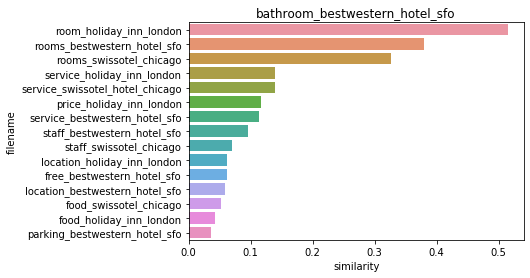

In [24]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# argsort()를 이용하여 앞예제의 첫번째 문서와 타 문서간 유사도가 큰 순으로 정렬한 인덱스 반환하되 자기 자신은 제외. 
sorted_index = similarity_pair.argsort()[:,::-1]
sorted_index = sorted_index[:, 1:]

# 유사도가 큰 순으로 hotel_indexes를 추출하여 재정렬. 
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)]

# 유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]

# 유사도가 큰 순으로 정렬된 Index와 유사도값을 이용하여 파일명과 유사도값을 
# Seaborn 막대 그래프로 시각화
hotel_1_sim_df = pd.DataFrame()
# y축
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
# x축
hotel_1_sim_df['similarity'] = hotel_1_sim_value

sns.barplot(x='similarity', y='filename',data=hotel_1_sim_df)
plt.title(comparison_docname)
plt.show()

### Q. 자동차로 군집화된 문서들을 이용해 특정 문서와 다른 문서간의 유사도를 비교

In [1]:
# Opinion Review 데이터 셋을 이용한 문서 유사도 측정
from nltk.stem import WordNetLemmatizer
import nltk
import string

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [2]:
import pandas as pd
import glob ,os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

path = './dataset/OpinosisDataset1.0/topics'
all_files = glob.glob(os.path.join(path, "*.data"))     
filename_list = []
opinion_text = []

for file_ in all_files:
    df = pd.read_table(file_,index_col=None, header=0,encoding='latin1')
    filename_ = file_.split('\\')[-1]
    filename = filename_.split('.')[0]
    filename_list.append(filename)
    opinion_text.append(df.to_string())

document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english' , \
                             ngram_range=(1,2), min_df=0.05, max_df=0.85 )
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label

C:\ProgramData\Anaconda3\envs\nlp_python\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [4]:
# 자동차
document_df[document_df['cluster_label']==2]

,filename,opinion_text,cluster_label
6,comfort_honda_accord_2008,...,2
7,comfort_toyota_camry_2007,...,2
16,gas_mileage_toyota_camry_2007,...,2
17,interior_honda_accord_2008,...,2
18,interior_toyota_camry_2007,...,2
22,mileage_honda_accord_2008,...,2
25,performance_honda_accord_2008,...,2
29,quality_toyota_camry_2007,...,2
37,seats_honda_accord_2008,...,2
47,transmission_toyota_camry_2007,...,2


In [5]:
from sklearn.metrics.pairwise import cosine_similarity

car_indexes = document_df[document_df['cluster_label']==2].index
print('자동차로 클러스터링 된 문서들의 DataFrame Index:\n', car_indexes)
print()

# 자동차로 클러스터링된 데이터 중 첫번째 문서를 추출하여 파일명 표시.  
comparison_docname = document_df.iloc[car_indexes[0]]['filename']
print('##### 비교 기준 문서명 ',comparison_docname,' 와 타 문서 유사도######')

''' document_df에서 추출한 Index 객체를 feature_vect로 입력하여 호텔 클러스터링된 feature_vect 추출\n
이를 이용하여 호텔로 클러스터링된 문서 중 첫번째 문서와 다른 문서간의 코사인 유사도 측정.'''
similarity_pair = cosine_similarity(feature_vect[car_indexes[0]] , feature_vect[car_indexes])
print(similarity_pair)

자동차로 클러스터링 된 문서들의 DataFrame Index:
 Int64Index([6, 7, 16, 17, 18, 22, 25, 29, 37, 47], dtype='int64')

##### 비교 기준 문서명  comfort_honda_accord_2008  와 타 문서 유사도######
[[1.         0.83969704 0.15655631 0.33044002 0.25981841 0.16544257
  0.27569738 0.18050974 0.65502034 0.06229873]]


Int64Index([7, 37, 17, 25, 18, 29, 22, 16, 47], dtype='int64')


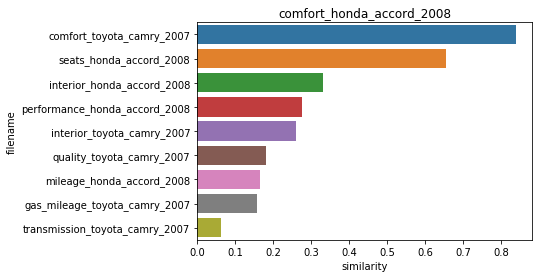

In [17]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# argsort()를 이용하여 앞예제의 첫번째 문서와 타 문서간 유사도가 큰 순으로 정렬한 인덱스 반환하되 자기 자신은 제외. 
# print(similarity_pair)
sorted_index = similarity_pair.argsort()[:,::-1]
# print(sorted_index)
sorted_index = sorted_index[:, 1:] # 자기 자신은 가장 큰 값으로 1 = 0번째
# print(sorted_index)

# 유사도가 큰 순으로 car_indexes를 추출하여 재정렬. 
car_sorted_indexes = car_indexes[sorted_index.reshape(-1)]
# print(car_sorted_indexes)

# 유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외
car_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
#print(car_1_sim_value)
car_1_sim_value = car_1_sim_value[1:] # 자기 자신은 가장 큰 값으로 1 = 0번째
#print(car_1_sim_value)

# 유사도가 큰 순으로 정렬된 Index와 유사도값을 이용하여 파일명과 유사도값을 
# Seaborn 막대 그래프로 시각화
car_1_sim_df = pd.DataFrame()

# y축
car_1_sim_df['filename'] = document_df.iloc[car_sorted_indexes]['filename']
# print(document_df.iloc[car_sorted_indexes]['filename'])

# x축
car_1_sim_df['similarity'] = car_1_sim_value
# print(car_1_sim_value)

# 시각화
sns.barplot(x='similarity', y='filename',data=car_1_sim_df)
plt.title(comparison_docname)
plt.show()

#### 해답

In [6]:
from sklearn.metrics.pairwise import cosine_similarity

# cluster_label=1인 데이터는 auto로 클러스터링된 데이터임. DataFrame에서 해당 Index를 추출
auto_indexes = document_df[document_df['cluster_label']==2].index
print('auto로 클러스터링 된 문서들의 DataFrame Index:', auto_indexes)

# auto로 클러스터링된 데이터 중 첫번째 문서를 추출하여 파일명 표시.  
comparison_docname = document_df.iloc[auto_indexes[0]]['filename']
print('##### 비교 기준 문서명 ',comparison_docname,' 와 타 문서 유사도######')

''' document_df에서 추출한 Index 객체를 feature_vect로 입력하여 auto 클러스터링된 feature_vect 추출 
이를 이용하여 auto로 클러스터링된 문서 중 첫번째 문서와 다른 문서간의 코사인 유사도 측정.'''
similarity_pair = cosine_similarity(feature_vect[auto_indexes[0]] , feature_vect[auto_indexes])
print(similarity_pair)


auto로 클러스터링 된 문서들의 DataFrame Index: Int64Index([6, 7, 16, 17, 18, 22, 25, 29, 37, 47], dtype='int64')
##### 비교 기준 문서명  comfort_honda_accord_2008  와 타 문서 유사도######
[[1.         0.83969704 0.15655631 0.33044002 0.25981841 0.16544257
  0.27569738 0.18050974 0.65502034 0.06229873]]


Text(0.5, 1.0, 'comfort_honda_accord_2008')

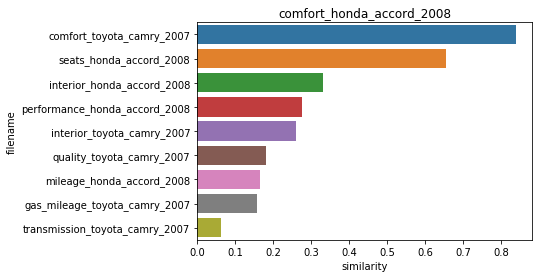

In [7]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# argsort()를 이용하여 앞예제의 첫번째 문서와 타 문서간 유사도가 큰 순으로 
# 정렬한 인덱스 반환하되 자기 자신은 제외. 
sorted_index = similarity_pair.argsort()[:,::-1]
sorted_index = sorted_index[:, 1:]

# 유사도가 큰 순으로 auto_indexes를 추출하여 재 정렬. 
auto_sorted_indexes = auto_indexes[sorted_index.reshape(-1)]

# 유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외
auto_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
auto_1_sim_value = auto_1_sim_value[1:]

# 유사도가 큰 순으로 정렬된 Index와 유사도값을 이용하여 파일명과 유사도값을 
# Seaborn 막대 그래프로 시각화
auto_1_sim_df = pd.DataFrame()
auto_1_sim_df['filename'] = document_df.iloc[auto_sorted_indexes]['filename']
auto_1_sim_df['similarity'] = auto_1_sim_value

sns.barplot(x='similarity', y='filename',data=auto_1_sim_df)
plt.title(comparison_docname)

### Q. 전자제품으로 군집화된 문서들을 이용해 특정 문서와 다른 문서간의 유사도를 비교

In [1]:
# Opinion Review 데이터 셋을 이용한 문서 유사도 측정
from nltk.stem import WordNetLemmatizer
import nltk
import string

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [2]:
import pandas as pd
import glob ,os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

path = './dataset/OpinosisDataset1.0/topics'
all_files = glob.glob(os.path.join(path, "*.data"))     
filename_list = []
opinion_text = []

for file_ in all_files:
    df = pd.read_table(file_,index_col=None, header=0,encoding='latin1')
    filename_ = file_.split('\\')[-1]
    filename = filename_.split('.')[0]
    filename_list.append(filename)
    opinion_text.append(df.to_string())

document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english' , \
                             ngram_range=(1,2), min_df=0.05, max_df=0.85 )
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label

C:\ProgramData\Anaconda3\envs\nlp_python\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [3]:
# 전자제품
document_df[document_df['cluster_label']==0]

,filename,opinion_text,cluster_label
0,accuracy_garmin_nuvi_255W_gps,...,0
2,battery-life_amazon_kindle,...,0
3,battery-life_ipod_nano_8gb,...,0
4,battery-life_netbook_1005ha,...,0
5,buttons_amazon_kindle,...,0
8,directions_garmin_nuvi_255W_gps,...,0
9,display_garmin_nuvi_255W_gps,...,0
10,eyesight-issues_amazon_kindle,...,0
11,features_windows7,...,0
12,fonts_amazon_kindle,...,0


In [4]:
# 전자제품
from sklearn.metrics.pairwise import cosine_similarity

elec_indexes = document_df[document_df['cluster_label']==0].index
print('전자제품으로 클러스터링 된 문서들의 DataFrame Index:\n', elec_indexes)
print()

# 전자제품로 클러스터링된 데이터 중 첫번째 문서를 추출하여 파일명 표시.  
comparison_docname = document_df.iloc[elec_indexes[0]]['filename']
print('##### 비교 기준 문서명 ',comparison_docname,' 와 타 문서 유사도######')

''' document_df에서 추출한 Index 객체를 feature_vect로 입력하여 호텔 클러스터링된 feature_vect 추출\n
이를 이용하여 호텔로 클러스터링된 문서 중 첫번째 문서와 다른 문서간의 코사인 유사도 측정.'''
similarity_pair = cosine_similarity(feature_vect[elec_indexes[0]] , feature_vect[elec_indexes])
print(similarity_pair)

전자제품으로 클러스터링 된 문서들의 DataFrame Index:
 Int64Index([ 0,  2,  3,  4,  5,  8,  9, 10, 11, 12, 19, 23, 26, 27, 33, 34, 35,
            36, 41, 42, 43, 44, 48, 49, 50],
           dtype='int64')

##### 비교 기준 문서명  accuracy_garmin_nuvi_255W_gps  와 타 문서 유사도######
[[1.         0.03004155 0.0399055  0.03321949 0.01659167 0.34657949
  0.19665144 0.03271487 0.03613626 0.01828703 0.02061394 0.0511192
  0.03626147 0.01762981 0.10104874 0.15598296 0.03667107 0.03388559
  0.03301419 0.02971984 0.20146574 0.02735475 0.18343275 0.01715513
  0.12148216]]


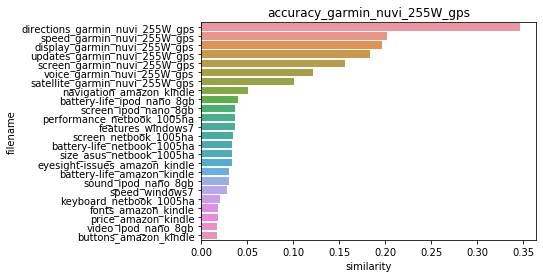

In [5]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# argsort()를 이용하여 앞예제의 첫번째 문서와 타 문서간 유사도가 큰 순으로 정렬한 인덱스 반환하되 자기 자신은 제외. 
# print(similarity_pair)
sorted_index = similarity_pair.argsort()[:,::-1]
# print(sorted_index)
sorted_index = sorted_index[:, 1:] # 자기 자신은 가장 큰 값으로 1 = 0번째
# print(sorted_index)

# 유사도가 큰 순으로 car_indexes를 추출하여 재정렬. 
elec_sorted_indexes = elec_indexes[sorted_index.reshape(-1)]
# print(elec_sorted_indexes)

# 유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외
elec_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
#print(elec_1_sim_value)
elec_1_sim_value = elec_1_sim_value[1:] # 자기 자신은 가장 큰 값으로 1 = 0번째
#print(elec_1_sim_value)

# 유사도가 큰 순으로 정렬된 Index와 유사도값을 이용하여 파일명과 유사도값을 
# Seaborn 막대 그래프로 시각화
elec_1_sim_df = pd.DataFrame()

# y축
elec_1_sim_df['filename'] = document_df.iloc[elec_sorted_indexes]['filename']
# print(document_df.iloc[elec_sorted_indexes]['filename'])

# x축
elec_1_sim_df['similarity'] = elec_1_sim_value
# print(car_1_sim_value)

# 시각화
sns.barplot(x='similarity', y='filename',data=elec_1_sim_df)
plt.title(comparison_docname)
plt.show()